# TP 7 Machines à vecteur de support
Dans ce TP, nous aimerions explorer le classifieur machineà vecteurs de support. Nous essayerons d'utiliser plusieurs noyaux et voir la difference entre leur capacité de séparation. 

Pour ceci, nous utiliserons plusieurs ensembles de données.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, KFold

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(863, 3)

Dans ces données (data), les 2 premières colonnes representent les caracteristiques, la dernière colonne represente la classe de l'exemple (positive ou négative).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# Notons que nous navons pas besoin d'intercept pour l'MVS de sklearn
X=data[:,:-1]
y=data[:,-1]
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [4]:
print('X', X.shape ,' y ', y.shape)

X (863, 2)  y  (863, 1)


Pas besoin aussi de transformer les étiquettes (labels) en vecteurs

# Entrainement 
Nous utiliserons ici une MVS avec differents noyaux:
- Linéaire
- Gaussien (RBF)
- Polyomial

In [5]:
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

C:\Users\pc\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pc\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pc\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pc\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

Mettons un lien avec ce que nous avons appris en regression linéaire

In [6]:
w = svc.coef_ # equivalent de theta
b = svc.intercept_[0] # equivalent de theta0
print(w,b)

[[-1.0022449   3.64731176]] -1.8675905935006316


Affichons la ligne séparatrice de cette MVS linéaire

In [7]:
w[0,1]

3.6473117571178184

In [8]:
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = (-(w[0,0] * x1_min + b) / w[0,1]), (-(w[0,0] * x1_max + b) / w[0,1])
print(x1_min, x1_max ,x2_min, x2_max )
# nous utiliserons ces valeurs afin d'afficher les deux points du segment qui represente la limite de decision

0.044931 0.99885 0.5243923707042262 0.7865197989351587


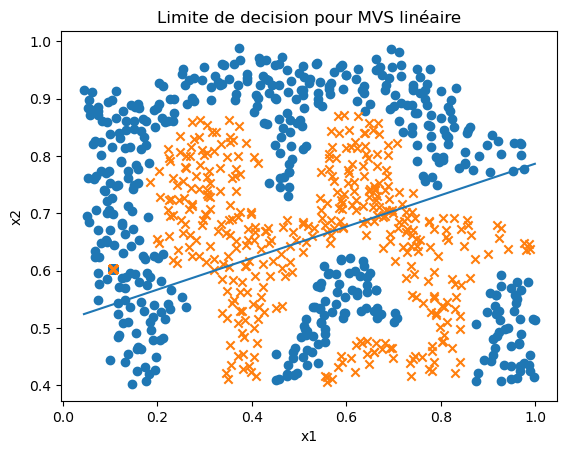

In [9]:
plt.scatter(X[np.where(y==1),0],X[np.where(y==1),1], label="y=1",marker ='o')
plt.scatter(X[np.where(y==0),0],X[np.where(y==0),1], label="y=0",marker ='x')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Limite de decision pour MVS linéaire")

plt.plot([x1_min, x1_max], [x2_min, x2_max])

Affichons la limite de décision avec le noyau Gaussien

C:\Users\pc\AppData\Local\Temp\ipykernel_34020\402093759.py:9: UserWarning: No contour levels were found within the data range.
  plt.contour(a,b,z,0, colors='green', linewidth=2)
C:\Users\pc\AppData\Local\Temp\ipykernel_34020\402093759.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(a,b,z,0, colors='green', linewidth=2)


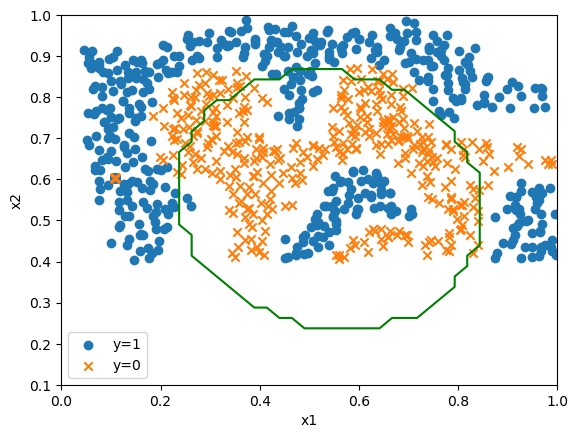

In [10]:
plt.scatter(X[np.where(y==1),0],X[np.where(y==1),1], label="y=1",marker ='o')
plt.scatter(X[np.where(y==0),0],X[np.where(y==0),1], label="y=0",marker ='x')
a = np.linspace(-1, 1.5, 100)
b = np.linspace(-1, 1.5, 100)
z = np.zeros((len(a), len(b)))
for i in range(len(a)):
  for j in range(len(b)):
    z[i,j] = rbf_svc.predict(np.c_[a[i], b[j]])
plt.contour(a,b,z,0, colors='green', linewidth=2)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.axis([0, 1, 0.1, 1])
#plt.axis([X[:, 0].min()-0.1, X[:, 0].max()+0.1, X[:, 1].min()-0.1, X[:, 1].max()+0.1])
plt.show()

Un autre ensemble de données pour la visualisation des vecteurs de support

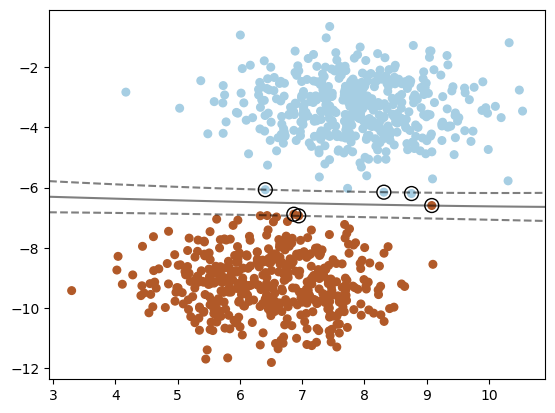

In [11]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# we create 40 separable points
X1, y1 = make_blobs(n_samples=863, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="rbf", C=100)
clf.fit(X1, y1)

plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

# Experimantations

Dans le cadre d'un notebook de TP sur les SVM, nous utilisons la technique de validation croisée K-fold et la recherche par grille pour trouver les meilleurs hyperparamètres.

La validation croisée K-fold divise l'ensemble de données en K sous-ensembles (folds) de taille égale. Le modèle SVM est entraîné K fois en utilisant K-1 folds pour l'entraînement et le fold restant pour la validation. Ce processus est répété K fois en utilisant chaque fold comme ensemble de validation une fois. Les performances du modèle sont ensuite moyennées pour obtenir une estimation plus fiable de sa performance.

La recherche par grille consiste à spécifier une grille de valeurs possibles pour les hyperparamètres. Pour chaque combinaison de valeurs de la grille, le modèle SVM est entraîné et évalué en utilisant la validation croisée K-fold. Les performances sont enregistrées pour chaque combinaison d'hyperparamètres. Les meilleures valeurs d'hyperparamètres sont celles qui donnent les performances les plus élevées sur les données de validation.

En combinant la validation croisée K-fold et la recherche par grille, nous itérons sur toutes les combinaisons possibles d'hyperparamètres, entraînant et évaluant le modèle SVM à chaque itération. Cela nous permet d'identifier les meilleures valeurs d'hyperparamètres pour maximiser les performances du modèle SVM sur nos données.

on commance par définir une fonction pour afficher les vecteurs de support et la limite de decision 

In [12]:

def plot_decision_boundary(X, y, classifier, draw_support_vector=False):
    plt.scatter(X[np.where(y==1),0],X[np.where(y==1),1], label="y=1",marker ='o')
    plt.scatter(X[np.where(y==0),0],X[np.where(y==0),1], label="y=0",marker ='x')

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = classifier.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(
        XX, YY, Z, colors="k", levels=[0], alpha=0.5, linestyles=["-"]
    )
    
    print("Les vecteurs de support :")
    print(classifier.support_vectors_)
    if draw_support_vector:
        # plot support vectors
        ax.scatter(
            classifier.support_vectors_[:, 0],
            classifier.support_vectors_[:, 1],
            s=10,
            linewidth=1,
            facecolors="none",
            edgecolors="k",
        )


###  noyau  linéaire

In [13]:

# Define the range of C values to search
param_grid = {'C': [0.1, 1, 10, 100]}

# Create the SVM model
svm_model = svm.SVC(kernel='linear')

# Create the K-Fold cross-validation object
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=kfold)


# Fit the model to the data
grid_search.fit(X, y.ravel())

# Print the best parameter and score
print("Best C value: ", grid_search.best_params_['C'])
print("Best score: ", grid_search.best_score_)


Best C value:  0.1
Best score:  0.545703477868112


### affichage de la limite de decision

[[-1.0022449   3.64731176]] -1.8675905935006316
0.044931 0.99885 0.5243923707042262 0.7865197989351587


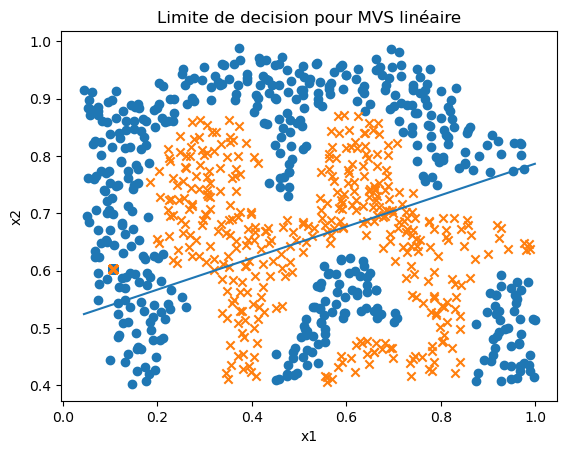

In [14]:
svc = svm.SVC(kernel='linear', C=C).fit(X, y.ravel())
w = svc.coef_ # equivalent de theta
b = svc.intercept_[0] # equivalent de theta0
print(w,b)
w[0,1]
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = (-(w[0,0] * x1_min + b) / w[0,1]), (-(w[0,0] * x1_max + b) / w[0,1])
print(x1_min, x1_max ,x2_min, x2_max )
# nous utiliserons ces valeurs afin d'afficher les deux points du segment qui represente la limite de decision
plt.scatter(X[np.where(y==1),0],X[np.where(y==1),1], label="y=1",marker ='o')
plt.scatter(X[np.where(y==0),0],X[np.where(y==0),1], label="y=0",marker ='x')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Limite de decision pour MVS linéaire")

plt.plot([x1_min, x1_max], [x2_min, x2_max])

###  noyau  polynomial

In [15]:

# Define the range of C and degree values to search
param_grid = {'C': [0.1, 1, 10], 'degree': range(1, 5),'gamma': [ 10,1,0.1, 0.01, 0.001]}

# Create the SVM model with a polynomial kernel
svm_model = svm.SVC(kernel='poly')


# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid,verbose=2)


# Fit the model to the data
grid_search.fit(X, y.ravel())



Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ..........................C=0.1, degree=1, gamma=10; total time=   0.0s
[CV] END ..........................C=0.1, degree=1, gamma=10; total time=   0.0s
[CV] END ..........................C=0.1, degree=1, gamma=10; total time=   0.0s
[CV] END ..........................C=0.1, degree=1, gamma=10; total time=   0.0s
[CV] END ..........................C=0.1, degree=1, gamma=10; total time=   0.0s
[CV] END ...........................C=0.1, degree=1, gamma=1; total time=   0.0s
[CV] END ...........................C=0.1, degree=1, gamma=1; total time=   0.0s
[CV] END ...........................C=0.1, degree=1, gamma=1; total time=   0.0s
[CV] END ...........................C=0.1, degree=1, gamma=1; total time=   0.0s
[CV] END ...........................C=0.1, degree=1, gamma=1; total time=   0.0s
[CV] END .........................C=0.1, degree=1, gamma=0.1; total time=   0.0s
[CV] END .........................C=0.1, degree

[CV] END ............................C=1, degree=1, gamma=10; total time=   0.0s
[CV] END .............................C=1, degree=1, gamma=1; total time=   0.0s
[CV] END .............................C=1, degree=1, gamma=1; total time=   0.0s
[CV] END .............................C=1, degree=1, gamma=1; total time=   0.0s
[CV] END .............................C=1, degree=1, gamma=1; total time=   0.0s
[CV] END .............................C=1, degree=1, gamma=1; total time=   0.0s
[CV] END ...........................C=1, degree=1, gamma=0.1; total time=   0.0s
[CV] END ...........................C=1, degree=1, gamma=0.1; total time=   0.0s
[CV] END ...........................C=1, degree=1, gamma=0.1; total time=   0.0s
[CV] END ...........................C=1, degree=1, gamma=0.1; total time=   0.0s
[CV] END ...........................C=1, degree=1, gamma=0.1; total time=   0.0s
[CV] END ..........................C=1, degree=1, gamma=0.01; total time=   0.0s
[CV] END ...................

[CV] END ..........................C=10, degree=1, gamma=0.1; total time=   0.0s
[CV] END ..........................C=10, degree=1, gamma=0.1; total time=   0.0s
[CV] END ..........................C=10, degree=1, gamma=0.1; total time=   0.0s
[CV] END ..........................C=10, degree=1, gamma=0.1; total time=   0.0s
[CV] END ..........................C=10, degree=1, gamma=0.1; total time=   0.0s
[CV] END .........................C=10, degree=1, gamma=0.01; total time=   0.0s
[CV] END .........................C=10, degree=1, gamma=0.01; total time=   0.0s
[CV] END .........................C=10, degree=1, gamma=0.01; total time=   0.0s
[CV] END .........................C=10, degree=1, gamma=0.01; total time=   0.0s
[CV] END .........................C=10, degree=1, gamma=0.01; total time=   0.0s
[CV] END ........................C=10, degree=1, gamma=0.001; total time=   0.0s
[CV] END ........................C=10, degree=1, gamma=0.001; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(kernel='poly'),
             param_grid={'C': [0.1, 1, 10], 'degree': range(1, 5),
                         'gamma': [10, 1, 0.1, 0.01, 0.001]},
             verbose=2)

In [16]:
# Print the best parameters and score
print("Best C value: ", grid_search.best_params_['C'])
print("Best gamma value: ", grid_search.best_params_['gamma'])
print("Best degree value: ", grid_search.best_params_['degree'])
print("Best score: ", grid_search.best_score_)

Best C value:  10
Best gamma value:  10
Best degree value:  4
Best score:  0.6484339292915715


### affichage de la limite de decision

Les vecteurs de support :
[[0.37212 0.85161]
 [0.35138 0.8633 ]
 [0.3053  0.85453]
 ...
 [0.91359 0.53772]
 [0.96889 0.56579]
 [0.98502 0.57983]]


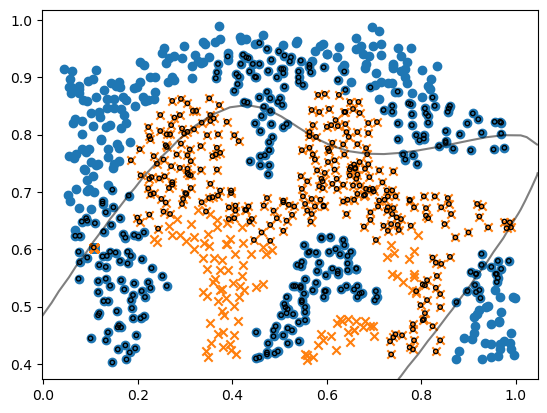

In [17]:
poly_svc = svm.SVC(kernel='poly', degree=4, C=10,gamma=10).fit(X, y.ravel())
plot_decision_boundary(X, y, poly_svc, True)

###  noyau  gaussien 


In [18]:


# Define the range of C and gamma values to search
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [ 100,10,1,0.1, 0.01, 0.001]}

# Create the SVM model with a Gaussian kernel
svm_model = svm.SVC(kernel='rbf')

# Create the K-Fold cross-validation object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=kfold, verbose=2)


# Fit the model to the data
grid_search.fit(X, y.ravel())



Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ...................................C=0.1, gamma=100; total time=   0.0s
[CV] END ...................................C=0.1, gamma=100; total time=   0.0s
[CV] END ...................................C=0.1, gamma=100; total time=   0.0s
[CV] END ...................................C=0.1, gamma=100; total time=   0.0s
[CV] END ...................................C=0.1, gamma=100; total time=   0.0s
[CV] END ....................................C=0.1, gamma=10; total time=   0.0s
[CV] END ....................................C=0.1, gamma=10; total time=   0.0s
[CV] END ....................................C=0.1, gamma=10; total time=   0.0s
[CV] END ....................................C=0.1, gamma=10; total time=   0.0s
[CV] END ....................................C=0.1, gamma=10; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C

[CV] END .....................................C=100, gamma=1; total time=   0.0s
[CV] END .....................................C=100, gamma=1; total time=   0.0s
[CV] END .....................................C=100, gamma=1; total time=   0.0s
[CV] END ...................................C=100, gamma=0.1; total time=   0.0s
[CV] END ...................................C=100, gamma=0.1; total time=   0.0s
[CV] END ...................................C=100, gamma=0.1; total time=   0.0s
[CV] END ...................................C=100, gamma=0.1; total time=   0.0s
[CV] END ...................................C=100, gamma=0.1; total time=   0.0s
[CV] END ..................................C=100, gamma=0.01; total time=   0.0s
[CV] END ..................................C=100, gamma=0.01; total time=   0.0s
[CV] END ..................................C=100, gamma=0.01; total time=   0.0s
[CV] END ..................................C=100, gamma=0.01; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [100, 10, 1, 0.1, 0.01, 0.001]},
             verbose=2)

In [19]:
# Print the best parameters and score
print("Best C value: ", grid_search.best_params_['C'])
print("Best gamma value: ", grid_search.best_params_['gamma'])
print("Best score: ", grid_search.best_score_)

Best C value:  10
Best gamma value:  100
Best score:  0.9930501411480037


### affichage de la limite de decision

Les vecteurs de support :
[[0.35138  0.8633  ]
 [0.33756  0.52558 ]
 [0.41359  0.78874 ]
 [0.46429  0.53874 ]
 [0.73848  0.55775 ]
 [0.39747  0.70249 ]
 [0.56567  0.64839 ]
 [0.82834  0.69225 ]
 [0.98042  0.6367  ]
 [0.89977  0.62939 ]
 [0.94124  0.63816 ]
 [0.4735   0.68933 ]
 [0.40899  0.41667 ]
 [0.83986  0.44123 ]
 [0.83986  0.49912 ]
 [0.8606   0.58684 ]
 [0.55876  0.41491 ]
 [0.55415  0.41667 ]
 [0.62788  0.47807 ]
 [0.68088  0.47456 ]
 [0.27304  0.85877 ]
 [0.22235  0.81316 ]
 [0.18548  0.75526 ]
 [0.20392  0.64825 ]
 [0.19931  0.65526 ]
 [0.23387  0.61842 ]
 [0.24078  0.61316 ]
 [0.74078  0.73596 ]
 [0.5818   0.8693  ]
 [0.59562  0.87105 ]
 [0.66705  0.85702 ]
 [0.70622  0.82193 ]
 [0.42512  0.85746 ]
 [0.23387  0.86184 ]
 [0.76613  0.75658 ]
 [0.72005  0.84284 ]
 [0.40438  0.87646 ]
 [0.31452  0.89839 ]
 [0.18318  0.78728 ]
 [0.16014  0.75365 ]
 [0.1924   0.625   ]
 [0.62327  0.89547 ]
 [0.6394   0.87792 ]
 [0.54954  0.8867  ]
 [0.95276  0.77412 ]
 [0.97581  0.77705 ]
 [0.0449

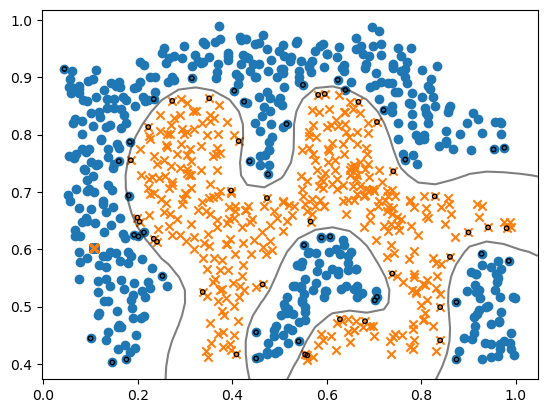

In [20]:
rbf_svc = svm.SVC(kernel='rbf', gamma=100, C=10).fit(X, y.ravel())
plot_decision_boundary(X, y, rbf_svc, True)

# Travail à faire
- 1) Nous aimerions bien choisir les paramètre de notre VMS ainsi que son type afin d'arriver à une limite de decision qui ressemblerai cis-bas.
- - Definir également le role de chaque paramètre.
- - Comprende et expliquer les sorties des MVS en utilisant sklearn
- - le lien peut vous aider  <link href="https://scikit-learn.org/stable/modules/svm.html" />
- 2) Nous aimerions dessiner les vecteurs de support pour notre ensemble de données.
- 3) Ce TP doit obligatoirement être accompagné d'un rapport qui devra contenir votre comprehension et analyse de ces paramètres.

<img src="goodBoundary.png" alt="Drawing" align ="left" style="width: 300px;"/>



# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le Lundi 09 Mai 2022 à 22h


In [21]:
# bonne chance